<a href="https://colab.research.google.com/github/Khaled-844AI/My-first-CNN-Image-Classifier-Happy-Sad-People/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf
import os
import matplotlib as plt

In [96]:
device_name = tf.test.gpu_device_name()
print(device_name)

In [97]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu , True)

In [98]:
import cv2
import imghdr

In [99]:
data_dir = 'drive/MyDrive/data'
image_exts = ['jpg' , 'jpeg' , 'bmp' , 'png']

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
from matplotlib import pyplot as plt
os.listdir(data_dir)


['happy', 'sad']

In [102]:
img = cv2.imread(os.path.join('drive/MyDrive/data' , 'happy' , '05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

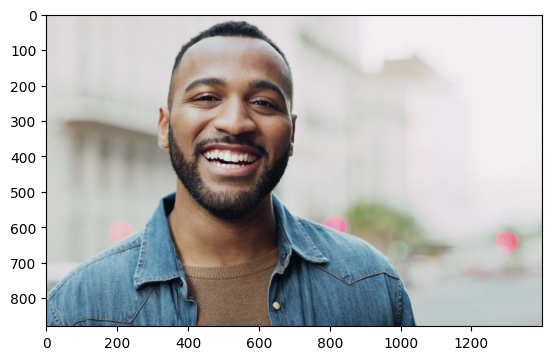

In [103]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [104]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list drive/MyDrive/data/happy/2560px-Happy_People.jpg
Image not in ext list drive/MyDrive/data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list drive/MyDrive/data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list drive/MyDrive/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list drive/MyDrive/data/happy/how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list drive/MyDrive/data/happy/happiness_thumbnail.jpg
Image not in ext list drive/MyDrive/data/happy/oman-and-diverse-friends-hanging-out-in-a-cafe-together-after-the-2290057229.jpg
Image not in ext list drive/MyDrive/data/happy/traitshappypeople.jpg
Image not in ext list drive/MyDrive/data/sad/5TRX6BRpc.gif
Image not in ext list drive/MyDrive/data/sad/depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list drive/MyDrive/data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Imag

In [105]:
import numpy as np

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 169 files belonging to 2 classes.


In [106]:
data_iterator = data.as_numpy_iterator()

In [107]:
batch = data_iterator.next()

In [108]:
batch

(array([[[[ 33.101562 ,  35.101562 ,  34.101562 ],
          [ 37.609375 ,  39.609375 ,  38.609375 ],
          [ 38.585938 ,  40.585938 ,  39.585938 ],
          ...,
          [ 51.085938 ,  53.085938 ,  52.085938 ],
          [ 57.375    ,  59.375    ,  58.375    ],
          [ 34.492188 ,  36.492188 ,  35.492188 ]],
 
         [[ 39.476562 ,  41.476562 ,  40.476562 ],
          [ 37.742188 ,  39.742188 ,  38.742188 ],
          [ 38.757812 ,  40.757812 ,  39.757812 ],
          ...,
          [ 32.570312 ,  34.570312 ,  33.570312 ],
          [ 33.15625  ,  35.15625  ,  34.15625  ],
          [ 38.867188 ,  40.867188 ,  39.867188 ]],
 
         [[ 42.898438 ,  44.898438 ,  43.898438 ],
          [ 44.242188 ,  46.242188 ,  45.242188 ],
          [ 43.65625  ,  45.65625  ,  44.65625  ],
          ...,
          [ 36.546875 ,  38.546875 ,  37.546875 ],
          [ 36.976562 ,  38.976562 ,  37.976562 ],
          [ 36.148438 ,  38.148438 ,  37.148438 ]],
 
         ...,
 
         [[ 

In [109]:
batch[0].shape

(32, 256, 256, 3)

In [110]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

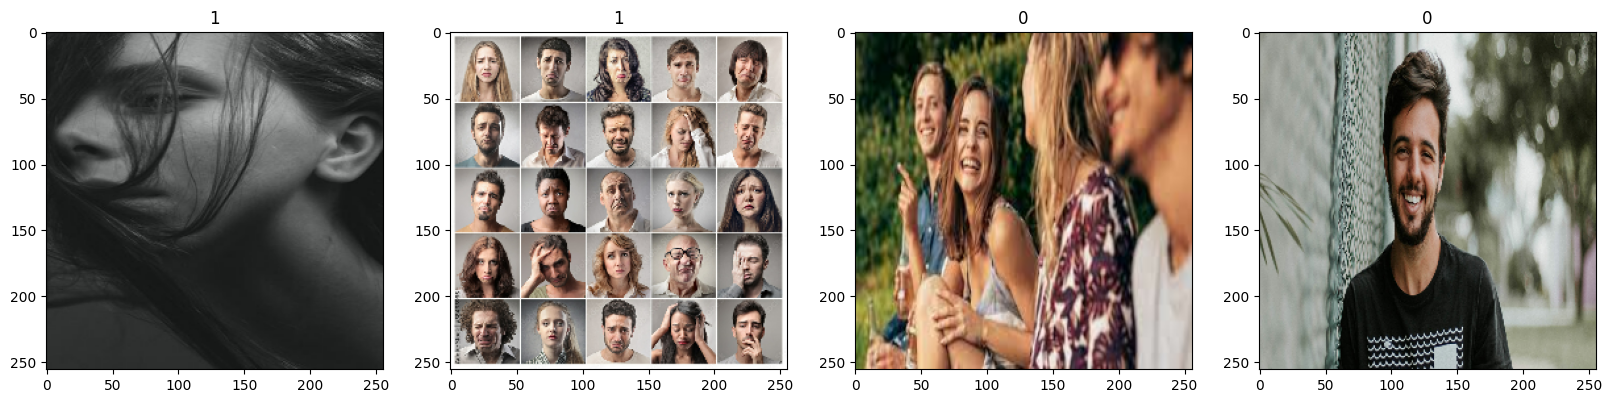

In [111]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [112]:
data = data.map(lambda x, y: (x/255 , y))

In [113]:

len(data)

6

In [114]:
scaled_iterator = data.as_numpy_iterator()

In [115]:
batch = scaled_iterator.next()

In [116]:
batch[0].max()

1.0

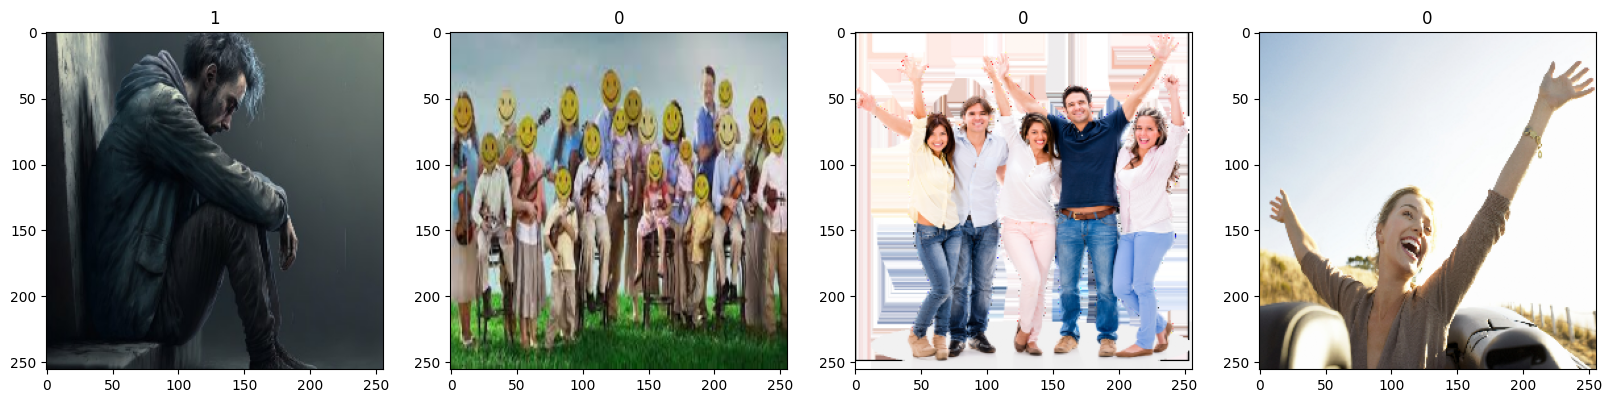

In [117]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [118]:
len(data) # 7 batches

6

In [119]:
train_size = int(len(data)*.7)
cv_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [120]:
train_size , cv_size , test_size # = 7 all the batches

(4, 2, 1)

In [121]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size + cv_size).take(test_size)


In [122]:
len(train)

4

In [123]:
import tensorflow

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [125]:
model = Sequential()

In [126]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
model.compile('adam' , loss = tf.keras.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [128]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [129]:
logdir = 'drive/MyDrive/data/logs'

In [130]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [154]:
his = model.fit(train , epochs = 19 , validation_data=cv , callbacks=[tensorboard_callback])

Epoch 1/19
4/4 [==============================] - 17s 4s/step - loss: 0.7059 - accuracy: 0.6094 - val_loss: 0.5836 - val_accuracy: 0.6098
Epoch 2/19
4/4 [==============================] - 16s 4s/step - loss: 0.6114 - accuracy: 0.5938 - val_loss: 0.5874 - val_accuracy: 0.6341
Epoch 3/19
4/4 [==============================] - 16s 4s/step - loss: 0.5930 - accuracy: 0.7656 - val_loss: 0.6092 - val_accuracy: 0.7805
Epoch 4/19
4/4 [==============================] - 16s 3s/step - loss: 0.5122 - accuracy: 0.8750 - val_loss: 0.5344 - val_accuracy: 0.6829
Epoch 5/19
4/4 [==============================] - 16s 4s/step - loss: 0.4664 - accuracy: 0.7969 - val_loss: 0.5690 - val_accuracy: 0.7073
Epoch 6/19
4/4 [==============================] - 20s 4s/step - loss: 0.5288 - accuracy: 0.7656 - val_loss: 0.3979 - val_accuracy: 0.8780
Epoch 7/19
4/4 [==============================] - 17s 4s/step - loss: 0.3829 - accuracy: 0.8828 - val_loss: 0.3057 - val_accuracy: 0.9024
Epoch 8/19
4/4 [==================

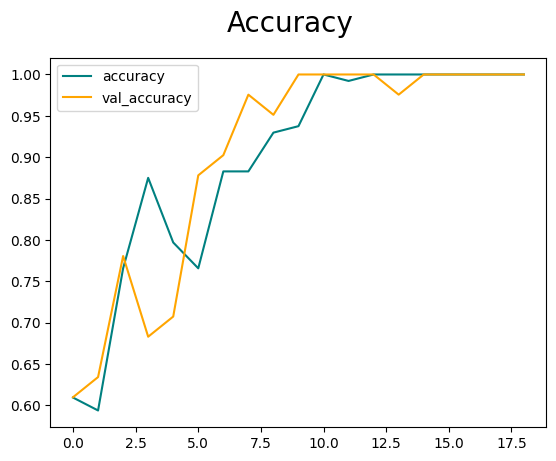

In [155]:

fig = plt.figure()
plt.plot(his.history['accuracy'], color='teal', label='accuracy')
plt.plot(his.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

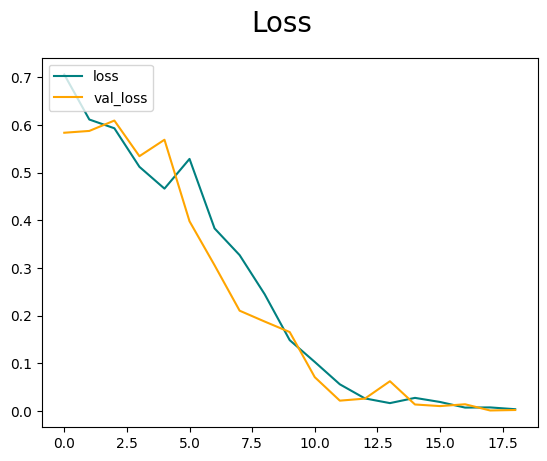

In [156]:
fig = plt.figure()
plt.plot(his.history['loss'], color='teal', label='loss')
plt.plot(his.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [157]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [158]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [159]:
len(test)

0

In [160]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [161]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.0 0.0 0.0


In [177]:
import cv2

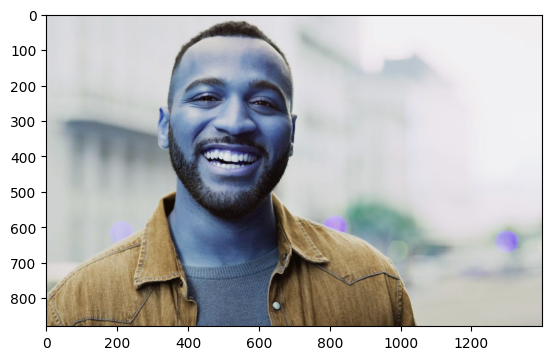

In [191]:
img = cv2.imread('drive/MyDrive/data/happy/05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

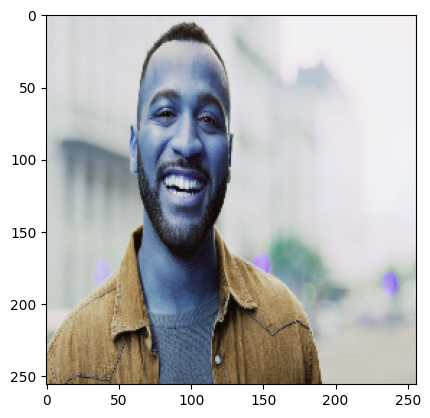

In [192]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [193]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [194]:
yhat

array([[0.01122927]], dtype=float32)

In [195]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


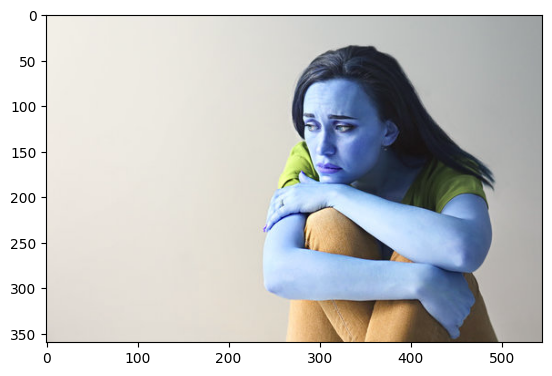

In [168]:
img = cv2.imread('drive/MyDrive/sad_woman.jpg')
plt.imshow(img)
plt.show()

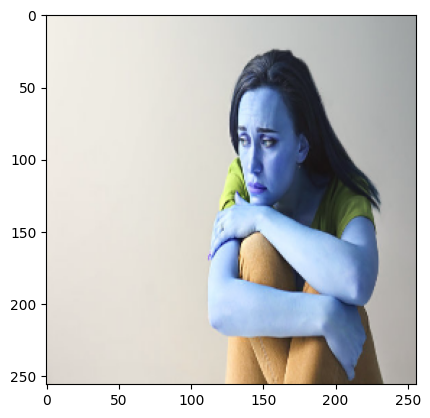

In [169]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [170]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [171]:
yhat

array([[0.93707514]], dtype=float32)

In [172]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [173]:
from tensorflow.keras.models import load_model

In [174]:
model.save(os.path.join('drive/MyDrive/models','imageclassifier.h5'))

In [175]:
new_model = load_model('drive/MyDrive/models/imageclassifier.h5')

In [176]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 112ms/step


array([[0.93707514]], dtype=float32)